## Exploratory Data Analysis of Gene Ontology using GO terms

Exploratory Data Analysis (EDA) of Gene Ontology (GO) using GO terms involves several steps to understand the underlying patterns and relationships in the data. Here are some steps you might take:

1. **Data Collection**: Obtain the GO annotations for genes of interest from a database like the Gene Ontology Consortium or other sources.

2. **Data Cleaning**: Check for and handle missing or incomplete annotations, remove duplicates, and ensure data integrity.

3. **Data Exploration**: 
   - Visualize the distribution of GO terms across genes.
   - Analyze the frequency of specific GO terms to identify the most common biological processes, molecular functions, and cellular components associated with the genes.

4. **Statistical Analysis**: 
   - Perform statistical tests to identify overrepresented or underrepresented GO terms compared to a background set of genes.
   - Use enrichment analysis tools (e.g., Fisher's exact test, hypergeometric test) to find significantly enriched GO terms.

5. **Clustering Analysis**: Use clustering techniques to group genes based on their GO annotations, which can reveal functional relationships among genes.

6. **Network Analysis**: Construct a network of GO terms or genes based on their relationships to identify functional modules or pathways.

7. **Visualization**: Use visualizations like heatmaps, bar charts, and network graphs to present the results of the analysis in an interpretable way.

8. **Annotation Enrichment Analysis**: Use tools like topGO, GOstats, or clusterProfiler in R or other similar tools to perform enrichment analysis on your GO terms.

9. **Functional Annotation Tools**: Use tools like DAVID, g:Profiler, or Enrichr to further explore the biological significance of your GO terms.

10. **Integration with Other Data**: Integrate GO analysis results with other omics data (e.g., gene expression, protein-protein interaction) to gain deeper insights into biological mechanisms.

By following these steps, you can gain a better understanding of the functional characteristics of genes based on their GO annotations and uncover valuable insights into biological processes, molecular functions, and cellular components.



In [1]:
import os
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [2]:
# Core Wormcat Annotation Gene Categories
category_names_core=['Cell cycle', 'Chaperone', 'Cilia', 'Cytoskeleton', 'Development','DNA', 'Extracellular material', 
                     'Globin', 'Lysosome', 'Major sperm protein', 'Metabolism', 'mRNA functions','Muscle function', 
                     'Neuronal function', 'Nuclear pore', 'Nucleic acid', 'Peroxisome', 'Protein modification', 
                     'Proteolysis general', 'Proteolysis proteasome',  'Ribosome', 'Signaling', 'Stress response', 
                     'Trafficking', 'Transcription factor', 'Transcription: chromatin', 'Transcription: dosage compensation', 
                     'Transcription: general machinery']

# Poorly Annotated Genes Categories Wormcat
category_names_pag = ['Transcription: unassigned', 'Transmembrane protein', 'Transmembrane transport', 'Unassigned']

# Other Annotated Genes Categories Wormcat
category_names_other = ['Non-coding RNA', 'Pseudogene']

category_names_lst = category_names_core + category_names_pag + category_names_other


In [4]:
# Load the primary Data for Analysis

# Create a dictionary to map to file names
category_names_dict = {}
for category_name in category_names_lst:
    file_name_root = f"{category_name.lower().replace(' ', '_')}"
    category_names_dict[file_name_root]=category_name
    
directory = './input_data/ontology'
category_dfs = {}

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        wc_category = category_names_dict[filename[3:-4]]
        df['Wc_category']= wc_category
        category_dfs[wc_category]=df
        
total=0
count=0        
ontology_data_full_df = pd.DataFrame()
for wc_category in sorted(category_dfs.keys()):
    length = len(category_dfs[wc_category])
    total += length
    count += 1
    print(f"{wc_category:<35} {length:>8,}")
    ontology_data_full_df = pd.concat([ontology_data_full_df, category_dfs[wc_category]], ignore_index=True)
    
print("="*45)
print(f"Count:{count:>4} {total:>33,}")


Cell cycle                             2,162
Chaperone                                593
Cilia                                    691
Cytoskeleton                           3,572
DNA                                    1,987
Development                            2,355
Extracellular material                 2,257
Globin                                   174
Lysosome                                 849
Major sperm protein                       55
Metabolism                            10,943
Muscle function                          656
Neuronal function                      2,770
Non-coding RNA                         1,391
Nuclear pore                             452
Nucleic acid                           1,022
Peroxisome                               138
Protein modification                   1,967
Proteolysis general                    2,503
Proteolysis proteasome                 2,533
Pseudogene                                 9
Ribosome                               1,793
Signaling 

In [5]:
category_names_pag = ['Transcription: unassigned', 'Transmembrane protein', 'Transmembrane transport', 'Unassigned']



In [7]:
ontology_data_full_df.columns
ontology_data_full_df = ontology_data_full_df.rename(columns={'Category': 'Go_Category'})

In [8]:
go_counts = ontology_data_full_df['Go_Id'].value_counts()
go_mf_counts = ontology_data_full_df[ontology_data_full_df['Go_Category'] == 'Molecular_function']['Go_Id'].value_counts()
go_cc_counts = ontology_data_full_df[ontology_data_full_df['Go_Category'] == 'Cellular_component']['Go_Id'].value_counts()
go_bp_counts = ontology_data_full_df[ontology_data_full_df['Go_Category'] == 'Biological_process']['Go_Id'].value_counts()

print(f"Molecular_function {len(go_mf_counts):>5,}")
print(f"Cellular_component {len(go_cc_counts):>5,}")
print(f"Biological_process {len(go_bp_counts):>5,}")
print("="*25)
print(f"All                {len(go_counts):>5,}")


Molecular_function 2,245
Cellular_component   947
Biological_process 3,693
All                6,885


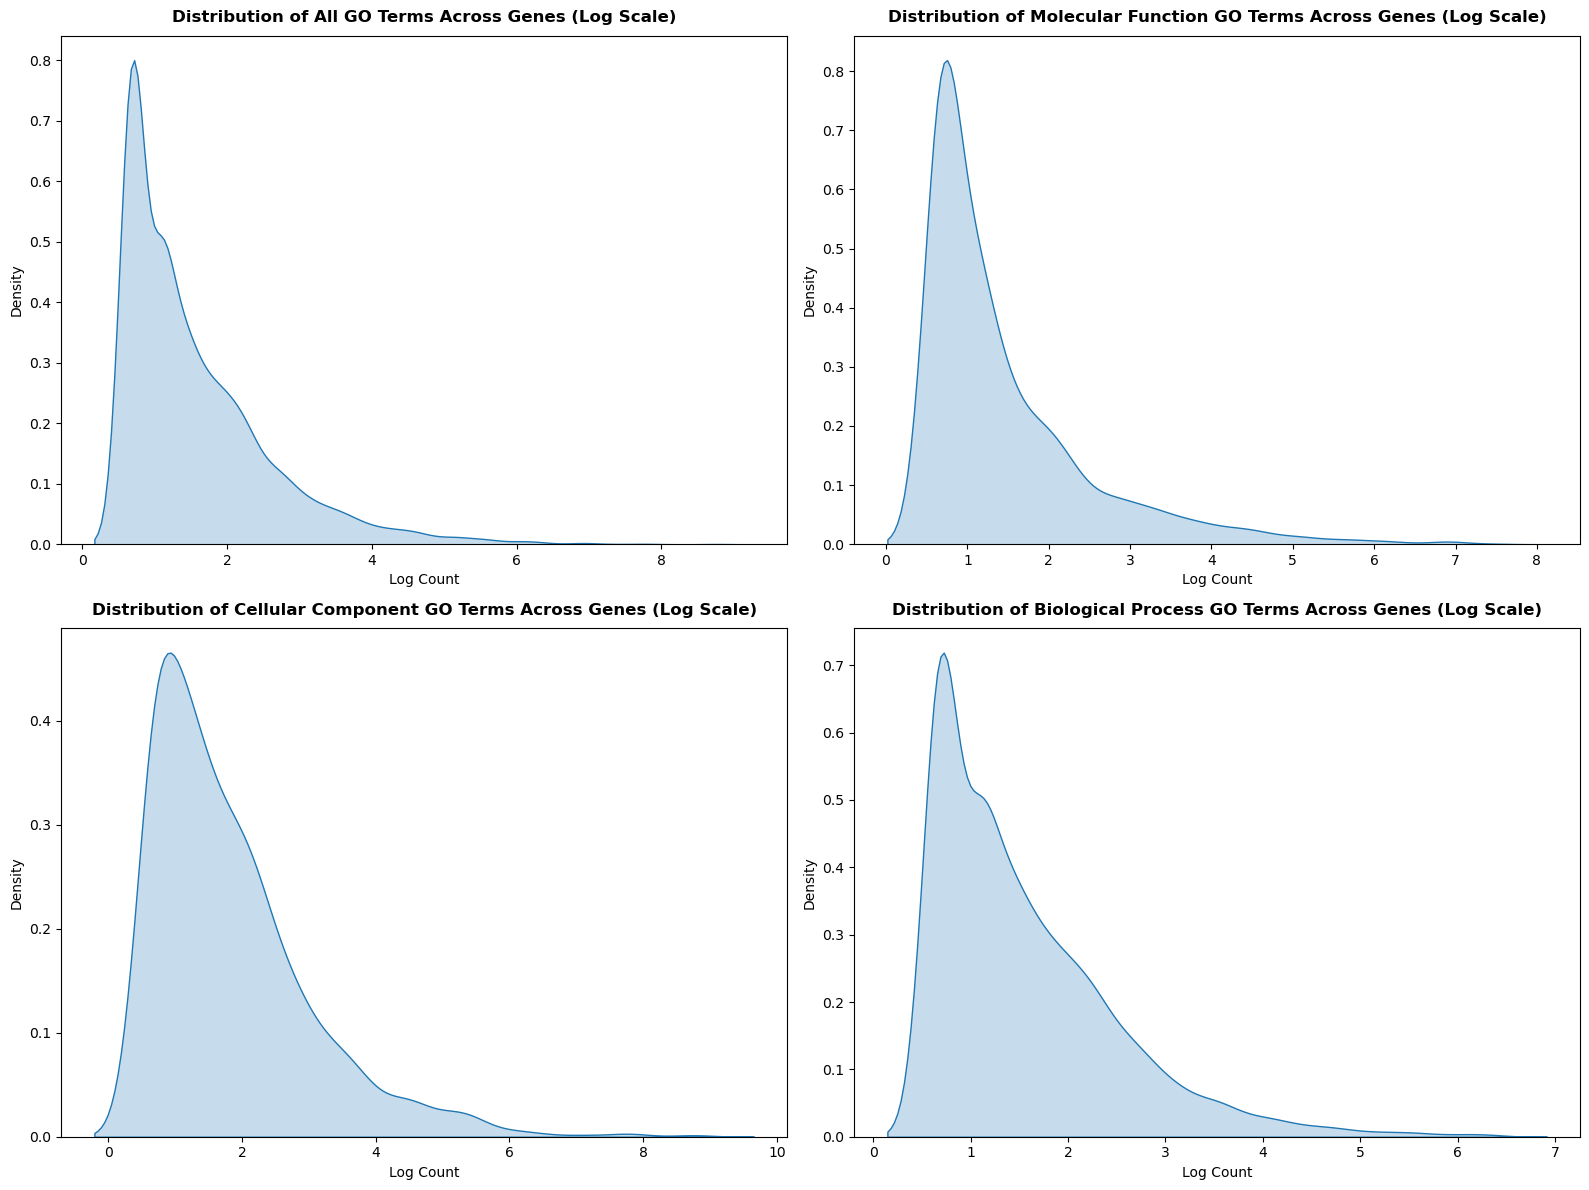

In [6]:
def plot_dist(data, category, subplot_index):
    plt.subplot(2, 2, subplot_index)
    log_counts = np.log1p(data)
    sns.kdeplot(data=log_counts, fill=True)
    plt.xlabel('Log Count')
    plt.ylabel('Density')
    plt.title(f"Distribution of {category} GO Terms Across Genes (Log Scale)", fontweight='bold', fontsize=12, pad=10)


plt.figure(figsize=(16, 12))

plot_dist(go_counts, "All", 1)
plot_dist(go_mf_counts, "Molecular Function", 2)
plot_dist(go_cc_counts, "Cellular Component", 3)
plot_dist(go_bp_counts, "Biological Process", 4)

plt.tight_layout()
plt.show()

In [7]:
ontology_data_full_df.head()

,Wormbase_Id,Go_Id,Go_Category,Go_Name,Wc_category
0,WBGene00000144,GO:0005680,Cellular_component,anaphase-promoting complex,Cell cycle
1,WBGene00000144,GO:0051301,Biological_process,cell division,Cell cycle
2,WBGene00000144,GO:0007049,Biological_process,cell cycle,Cell cycle
3,WBGene00000144,GO:0031145,Biological_process,anaphase-promoting complex-dependent catabolic...,Cell cycle
4,WBGene00000144,GO:0016567,Biological_process,protein ubiquitination,Cell cycle


In [12]:
def one_hot_encode_ontology_data(genes_to_encode_df, go_category):
    #Create empty go terms dict
    unique_go_ids = ontology_data_full_df['Go_Id'].unique()
    empty_go_terms_dict = {go_term: 0 for go_term in unique_go_ids}

    genes_to_encode_ids = genes_to_encode_df['Wormbase_Id'].unique()

    one_hot_encoded_lst = []
    counter=0
    number_of_rows = len(genes_to_encode_ids)
    for wormbase_id in genes_to_encode_ids:
        print(".", end='')
        counter +=1
        go_terms_dict = empty_go_terms_dict.copy()
        go_terms_for_wb_id_df = ontology_data_full_df[(ontology_data_full_df['Wormbase_Id'] == wormbase_id) & (ontology_data_full_df['Go_Category'] == go_category)]
        for index, go_terms_for_wb_id_row in go_terms_for_wb_id_df.iterrows():
            go_terms_dict[go_terms_for_wb_id_row['Go_Id']]=1

        one_hot_list=list(go_terms_dict.values())
        row = [wormbase_id] + one_hot_list    
        one_hot_encoded_lst.append(row)

        # Show progress
        if counter % 100 == 0:
            print(f"{counter:>4} of {number_of_rows:>6,} {wormbase_id}")

    print(f"{counter:>4} of {number_of_rows:>6,}")

    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_lst, columns=['Wormbase_Id']+list(go_terms_dict.keys()))
    return one_hot_encoded_df



In [24]:

def create_umap(one_hot_encoded_df):
    # Select only the GO annotations for clustering
    X = one_hot_encoded_df.drop('Wormbase_Id', axis=1)
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply UMAP to reduce the data to 2 dimensions
    umap_model = umap.UMAP(n_components=2)
    X_umap = umap_model.fit_transform(X_scaled)
    return X_umap

def plot_umap(X_umap, category, subplot_index):
    # Plot the UMAP visualization
    #plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, subplot_index)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='viridis', s=20, alpha=0.5)
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f"UMAP Visualization of Genes Based on {category} GO Annotations", fontweight='bold', fontsize=12, pad=10)
    


Encoding Cellular_component
.................................................................................................... 100 of  5,868 WBGene00007281
.................................................................................................... 200 of  5,868 WBGene00007608
.................................................................................................... 300 of  5,868 WBGene00008100
.................................................................................................... 400 of  5,868 WBGene00001163
.................................................................................................... 500 of  5,868 WBGene00008972
.................................................................................................... 600 of  5,868 WBGene00018103
.................................................................................................... 700 of  5,868 WBGene00044304
..............................................................

/home/dan/miniconda3/envs/dan-dev-sc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Encoding Biological_process
.................................................................................................... 100 of  5,868 WBGene00007281
.................................................................................................... 200 of  5,868 WBGene00007608
.................................................................................................... 300 of  5,868 WBGene00008100
.................................................................................................... 400 of  5,868 WBGene00001163
.................................................................................................... 500 of  5,868 WBGene00008972
.................................................................................................... 600 of  5,868 WBGene00018103
.................................................................................................... 700 of  5,868 WBGene00044304
..............................................................

/home/dan/miniconda3/envs/dan-dev-sc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Encoding Molecular_function
.................................................................................................... 100 of  5,868 WBGene00007281
.................................................................................................... 200 of  5,868 WBGene00007608
.................................................................................................... 300 of  5,868 WBGene00008100
.................................................................................................... 400 of  5,868 WBGene00001163
.................................................................................................... 500 of  5,868 WBGene00008972
.................................................................................................... 600 of  5,868 WBGene00018103
.................................................................................................... 700 of  5,868 WBGene00044304
..............................................................

/home/dan/miniconda3/envs/dan-dev-sc/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


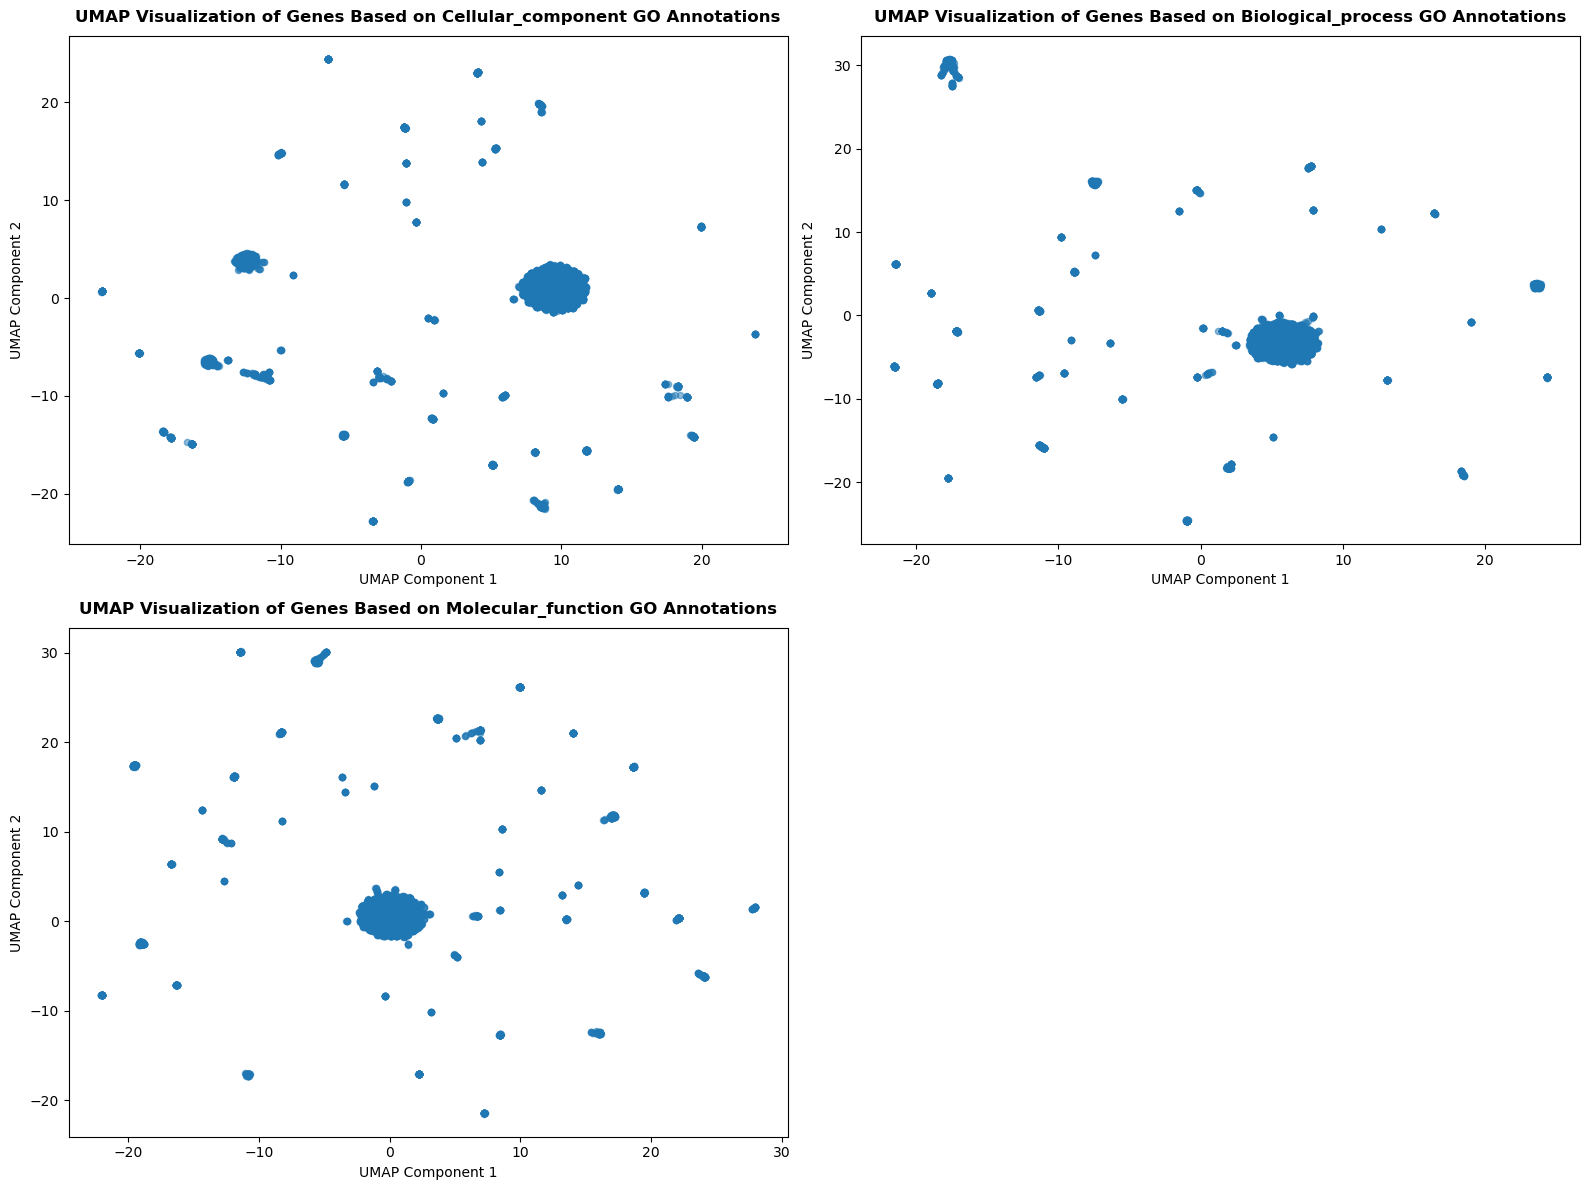

In [27]:
go_categories= ["Cellular_component","Biological_process", "Molecular_function"]

category_list = ['Transcription: unassigned', 'Transmembrane protein', 'Transmembrane transport', 'Unassigned']

genes_to_encode_df = pd.DataFrame()
for category in category_list:
    genes_to_encode_df = pd.concat([genes_to_encode_df, category_dfs[category]], ignore_index=True)

plt.figure(figsize=(16, 12))
for index, go_category in enumerate(go_categories):
    print(f"Encoding {go_category}")
    one_hot_encoded_df = one_hot_encode_ontology_data(genes_to_encode_df, go_category)
    X_umap = create_umap(one_hot_encoded_df)
    plot_umap(X_umap, go_category, index+1)


plt.tight_layout()
plt.show()

1814


/home/dan/miniconda3/envs/dan-dev-sc/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


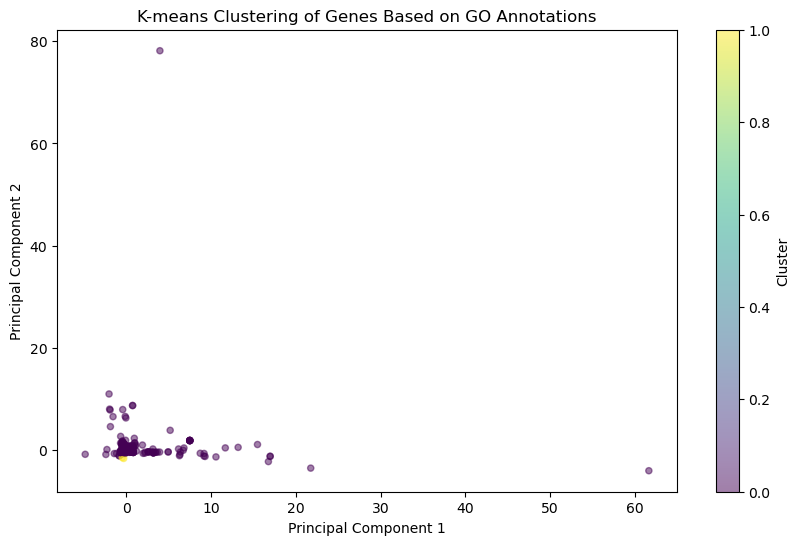

In [35]:
# Select only the GO annotations for clustering
X = one_hot_encoded_df.drop('Wormbase_Id', axis=1)
print(len(X))
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
one_hot_encoded_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=one_hot_encoded_df['Cluster'], cmap='viridis', s=20, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Genes Based on GO Annotations')
plt.colorbar(label='Cluster')
plt.show()
